In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
path='D:/code academy/week 12/churn_100k.csv/churn_100k.csv'

In [39]:
df=pd.read_csv(path)

In [40]:
pd.set_option('display.max_columns', 500)

In [41]:
df.head()

,monthly_minutes,customerServiceCalls,streaming_minutes,TotalBilled,PrevBalance,latePayments,ip_address_asn,phone_area_code,customer_reg_date,email_domain,phoneModel,billing_city,billing_postal,billing_state,partner,PhoneService,MultipleLines,streamingPlan,mobileHotspot,wifiCallingText,OnlineBackup,device_protection,number_phones,contract_code,currency_code,maling_code,paperlessBilling,paymentMethod,EVENT_TIMESTAMP,customerId,billing_address,gender,networkSpeed,senior_citizen,EVENT_LABEL
0,22604.0,2.0,26525.0,285.0,47.0,5.0,16767.0,253.0,2020-04-15,yahoo.com,Samsung Galaxy S20 Ultra,West Shannonside,39120.0,Rhode Island,Yes,Yes,No,3GB,Yes,No,Yes,O,6.0,B,usd,H,No,Mailed Check,2019-11-30 23:48:32,1-136-08562-9,5592 Gill Pine Suite 387,Female,5G,1.0,legit
1,17059.0,2.0,16887.0,201.0,45.0,5.0,53966.0,241.0,2020-04-12,gmail.com,Samsung Galaxy S10 / S10 Plus,Jacquelinetown,24469.0,Alaska,Yes,Yes,Yes,Unlmited,No,Yes,Yes,S,5.0,S,eur,V,Yes,Mailed Check,2020-09-27 03:23:42,0-384-11264-1,5806 Kathleen Mount Suite 186,Male,5G,0.0,legit
2,25848.0,2.0,26783.0,264.0,44.0,6.0,19278.0,232.0,2020-02-22,gmail.com,OnePlus 8 Pro,North Luke,68797.0,North Dakota,Yes,Yes,Yes,Unlmited,No,Yes,No InternetService,V,5.0,W,cad,R,Yes,Credit Card,2020-01-12 15:18:38,0-08-151665-7,5037 Allen Square Apt. 727,Male,5G,1.0,legit
3,22080.0,3.0,23649.0,274.0,49.0,6.0,16680.0,236.0,2020-08-05,yahoo.com,iPhone XS,West Coreyberg,19352.0,Nebraska,No,Yes,No,3GB,No,No,Yes,O,6.0,W,cad,N,No,Mailed Check,2020-10-09 18:07:46,0-02-200816-0,841 Griffin Route Suite 824,Female,5G,0.0,legit
4,23871.0,3.0,7705.0,236.0,61.0,5.0,51308.0,243.0,2019-11-16,gmail.com,Samsung Galaxy S10e,Joshuachester,46999.0,Pennsylvania,Yes,Yes,Yes,3GB,No,Yes,Yes,C,7.0,W,cad,V,Yes,Electronic Check,2020-10-17 22:27:42,0-87476-135-2,46185 Mejia Manor Apt. 558,Male,4Glte,1.0,legit


In [42]:
print('columns-', df.columns)
print('shape-', df.shape)

columns- Index(['monthly_minutes', 'customerServiceCalls', 'streaming_minutes',
       'TotalBilled', 'PrevBalance', 'latePayments', 'ip_address_asn',
       'phone_area_code', 'customer_reg_date', 'email_domain', 'phoneModel',
       'billing_city', 'billing_postal', 'billing_state', 'partner',
       'PhoneService', 'MultipleLines', 'streamingPlan', 'mobileHotspot',
       'wifiCallingText', 'OnlineBackup', 'device_protection', 'number_phones',
       'contract_code', 'currency_code', 'maling_code', 'paperlessBilling',
       'paymentMethod', 'EVENT_TIMESTAMP', 'customerId', 'billing_address',
       'gender', 'networkSpeed', 'senior_citizen', 'EVENT_LABEL'],
      dtype='object')
shape- (101000, 35)


In [43]:
df.isnull().sum()

monthly_minutes         22
customerServiceCalls    27
streaming_minutes       23
TotalBilled             36
PrevBalance             27
latePayments            23
ip_address_asn          18
phone_area_code         30
customer_reg_date       31
email_domain            31
phoneModel              26
billing_city            31
billing_postal          30
billing_state           29
partner                 29
PhoneService            30
MultipleLines           27
streamingPlan           31
mobileHotspot           40
wifiCallingText         34
OnlineBackup            33
device_protection       34
number_phones           33
contract_code           33
currency_code           31
maling_code             33
paperlessBilling        33
paymentMethod           27
EVENT_TIMESTAMP         30
customerId              26
billing_address         24
gender                  30
networkSpeed            30
senior_citizen          38
EVENT_LABEL              0
dtype: int64

Data Transformation

In [44]:
df.dropna(inplace=True)

In [45]:
#date time format
df['customer_reg_date']=pd.to_datetime(df['customer_reg_date'])
df['EVENT_TIMESTAMP']=pd.to_datetime(df['EVENT_TIMESTAMP'])

In [46]:
#with map
df['partner']=df['partner'].map({'Yes':1, 'No':0})
df['PhoneService']=df['PhoneService'].map({'Yes':1, 'No':0})
df['MultipleLines']=df['MultipleLines'].map({'Yes':1, 'No':0})
df['mobileHotspot']=df['mobileHotspot'].map({'Yes':1, 'No':0})
df['wifiCallingText']=df['wifiCallingText'].map({'Yes':1, 'No':0})
df['paperlessBilling']=df['paperlessBilling'].map({'Yes':1, 'No':0})
df['OnlineBackup']=df['OnlineBackup'].map({'Yes':1, 'No':0, 'No InternetServic':0})
df['gender']=df['gender'].map({'Female':1, 'Male':0})
#Target to numeric
df['EVENT_LABEL']=df['EVENT_LABEL'].map({'legit':0, 'fraud':1})

In [47]:
#frequency encoding
mailing_code_dict=df['maling_code'].value_counts(normalize=True).to_dict()
df['maling_code']=df['maling_code'].map(mailing_code_dict)
contract_code_dict=df['contract_code'].value_counts(normalize=True).to_dict()
df['contract_code']=df['contract_code'].map(mailing_code_dict)
device_protection_dict=df['device_protection'].value_counts(normalize=True).to_dict()
df['device_protection']=df['device_protection'].map(mailing_code_dict)
billing_state_dict=df['billing_state'].value_counts(normalize=True).to_dict()
df['billing_state']=df['billing_state'].map(billing_state_dict)

In [48]:
def phone_category(row):
    if 'Samsung' in str(row['phoneModel']):
        return 'Samsung'
    elif 'iPhone' in str(row['phoneModel']):
        return 'iPhone'
    else:
        return 'Other'

df['phoneCategory'] = df.apply(phone_category, axis=1)

In [49]:
df['streamingPlan_is_3GB']=df['streamingPlan'].apply(lambda row: 1 if '3GB' in str(row) else 0)
df['streamingPlan_is_Unlmited']=df['streamingPlan'].apply(lambda row: 1 if 'Unlmited' in str(row) else 0)
df['networkSpeed_is_5G']=df['networkSpeed'].apply(lambda row: 1 if str(row)=='5G' else 0)
df['networkSpeed_is_4Glte']=df['networkSpeed'].apply(lambda row: 1 if str(row)=='4Glte' else 0)

In [50]:
df['Year']=df['EVENT_TIMESTAMP'].dt.year
df['Quarter']=df['EVENT_TIMESTAMP'].dt.quarter
df['Month']=df['EVENT_TIMESTAMP'].dt.month
df['Month_begin']=df['EVENT_TIMESTAMP'].dt.is_month_start
df['Month_end']=df['EVENT_TIMESTAMP'].dt.is_month_end
df['Day']=df['EVENT_TIMESTAMP'].dt.day
df['Day_Week']=df['EVENT_TIMESTAMP'].dt.day_of_week
df['Hour']=df['EVENT_TIMESTAMP'].dt.hour
df['Month_begin']=df['Month_begin'].astype(int)
df['Month_end']=df['Month_end'].astype(int)
df['is_weekend']=df['Day_Week'].apply(lambda row: 1 if row==5 or row==6 else 0)

In [51]:
df=pd.get_dummies(data=df, columns=['email_domain'], prefix='email_is', dtype=int)
df=pd.get_dummies(data=df, columns=['phoneCategory'], prefix='Phone_is_', dtype=int)
df=pd.get_dummies(data=df, columns=['paymentMethod'], prefix='Payment_is_via', dtype=int)
df=pd.get_dummies(data=df, columns=['currency_code'], prefix='currency_is', dtype=int)

In [52]:
df.drop(columns=['phoneModel','Phone_is__Other','streamingPlan','mobileHotspot', 'wifiCallingText','OnlineBackup', 'networkSpeed', 'billing_address', 'customerId','billing_city'], inplace=True)

In [53]:
df.head()

,monthly_minutes,customerServiceCalls,streaming_minutes,TotalBilled,PrevBalance,latePayments,ip_address_asn,phone_area_code,customer_reg_date,billing_postal,billing_state,partner,PhoneService,MultipleLines,device_protection,number_phones,contract_code,maling_code,paperlessBilling,EVENT_TIMESTAMP,gender,senior_citizen,EVENT_LABEL,streamingPlan_is_3GB,streamingPlan_is_Unlmited,networkSpeed_is_5G,networkSpeed_is_4Glte,Year,Quarter,Month,Month_begin,Month_end,Day,Day_Week,Hour,is_weekend,email_is_gmail.com,email_is_hotmail.com,email_is_yahoo.com,Phone_is__Samsung,Phone_is__iPhone,Payment_is_via_Bank Transfer,Payment_is_via_Credit Card,Payment_is_via_Electronic Check,Payment_is_via_Mailed Check,currency_is_cad,currency_is_eur,currency_is_usd
0,22604.0,2.0,26525.0,285.0,47.0,5.0,16767.0,253.0,2020-04-15,39120.0,0.004680,1,1,0,0.018352,6.0,0.129073,0.009221,0,2019-11-30 23:48:32,1,1.0,0,1,0,1,0,2019,4,11,0,1,30,5,23,1,0,0,1,1,0,0,0,0,1,0,0,1
1,17059.0,2.0,16887.0,201.0,45.0,5.0,53966.0,241.0,2020-04-12,24469.0,0.063406,1,1,1,0.091669,5.0,0.091669,0.036934,1,2020-09-27 03:23:42,0,0.0,0,0,1,1,0,2020,3,9,0,0,27,6,3,1,1,0,0,1,0,0,0,0,1,0,1,0
2,25848.0,2.0,26783.0,264.0,44.0,6.0,19278.0,232.0,2020-02-22,68797.0,0.024422,1,1,1,0.036934,5.0,0.140504,0.060506,1,2020-01-12 15:18:38,0,1.0,0,0,1,1,0,2020,1,1,0,0,12,6,15,1,1,0,0,0,0,0,1,0,0,1,0,0
3,22080.0,3.0,23649.0,274.0,49.0,6.0,16680.0,236.0,2020-08-05,19352.0,0.031873,0,1,0,0.018352,6.0,0.140504,0.098000,0,2020-10-09 18:07:46,1,0.0,0,1,0,1,0,2020,4,10,0,0,9,4,18,0,0,0,1,0,1,0,0,0,1,1,0,0
4,23871.0,3.0,7705.0,236.0,61.0,5.0,51308.0,243.0,2019-11-16,46999.0,0.055606,1,1,1,0.119842,7.0,0.140504,0.036934,1,2020-10-17 22:27:42,0,1.0,0,1,0,0,1,2020,4,10,0,0,17,5,22,1,1,0,0,1,0,0,0,1,0,1,0,0


In [54]:
df_num=df.select_dtypes(['integer', 'floating'])

In [55]:
df_num

,monthly_minutes,customerServiceCalls,streaming_minutes,TotalBilled,PrevBalance,latePayments,ip_address_asn,phone_area_code,billing_postal,billing_state,partner,PhoneService,MultipleLines,device_protection,number_phones,contract_code,maling_code,paperlessBilling,gender,senior_citizen,EVENT_LABEL,streamingPlan_is_3GB,streamingPlan_is_Unlmited,networkSpeed_is_5G,networkSpeed_is_4Glte,Year,Quarter,Month,Month_begin,Month_end,Day,Day_Week,Hour,is_weekend,email_is_gmail.com,email_is_hotmail.com,email_is_yahoo.com,Phone_is__Samsung,Phone_is__iPhone,Payment_is_via_Bank Transfer,Payment_is_via_Credit Card,Payment_is_via_Electronic Check,Payment_is_via_Mailed Check,currency_is_cad,currency_is_eur,currency_is_usd
0,22604.0,2.0,26525.0,285.0,47.0,5.0,16767.0,253.0,39120.0,0.004680,1,1,0,0.018352,6.0,0.129073,0.009221,0,1,1.0,0,1,0,1,0,2019,4,11,0,1,30,5,23,1,0,0,1,1,0,0,0,0,1,0,0,1
1,17059.0,2.0,16887.0,201.0,45.0,5.0,53966.0,241.0,24469.0,0.063406,1,1,1,0.091669,5.0,0.091669,0.036934,1,0,0.0,0,0,1,1,0,2020,3,9,0,0,27,6,3,1,1,0,0,1,0,0,0,0,1,0,1,0
2,25848.0,2.0,26783.0,264.0,44.0,6.0,19278.0,232.0,68797.0,0.024422,1,1,1,0.036934,5.0,0.140504,0.060506,1,0,1.0,0,0,1,1,0,2020,1,1,0,0,12,6,15,1,1,0,0,0,0,0,1,0,0,1,0,0
3,22080.0,3.0,23649.0,274.0,49.0,6.0,16680.0,236.0,19352.0,0.031873,0,1,0,0.018352,6.0,0.140504,0.098000,0,1,0.0,0,1,0,1,0,2020,4,10,0,0,9,4,18,0,0,0,1,0,1,0,0,0,1,1,0,0
4,23871.0,3.0,7705.0,236.0,61.0,5.0,51308.0,243.0,46999.0,0.055606,1,1,1,0.119842,7.0,0.140504,0.036934,1,0,1.0,0,1,0,0,1,2020,4,10,0,0,17,5,22,1,1,0,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100995,15244.0,2.0,19118.0,270.0,50.0,6.0,56225.0,259.0,6462.0,0.042904,0,0,0,0.140504,6.0,0.004320,0.009221,0,1,1.0,0,0,1,0,1,2019,4,11,0,0,16,5,12,1,1,0,0,1,0,0,0,1,0,1,0,0
100996,16427.0,1.0,22345.0,276.0,58.0,4.0,54916.0,250.0,46443.0,0.054395,0,0,1,0.098000,4.0,0.091669,0.068007,0,1,0.0,0,1,0,1,0,2019,4,11,0,0,29,4,7,0,1,0,0,0,1,0,0,1,0,1,0,0
100997,24106.0,1.0,27419.0,268.0,54.0,4.0,55589.0,262.0,53059.0,0.042904,0,0,1,0.140504,3.0,0.068007,0.068007,1,1,1.0,0,0,1,0,1,2020,1,1,0,0,3,4,6,0,0,1,0,1,0,0,0,0,1,1,0,0
100998,14862.0,2.0,28359.0,294.0,56.0,4.0,14379.0,258.0,80275.0,0.060846,1,0,1,0.140504,5.0,0.036934,0.004160,1,0,1.0,0,0,1,0,1,2020,3,8,0,0,27,3,0,0,1,0,0,1,0,0,0,0,1,1,0,0


In [56]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
pca.fit( df_num.drop( columns = ['EVENT_LABEL']) )
pca_component = pca.transform( df_num.drop( columns = ['EVENT_LABEL']) )
print(pca.explained_variance_ratio_)
df_num['PCA'] = pca_component


[0.70917427]


In [57]:
df.describe()

,monthly_minutes,customerServiceCalls,streaming_minutes,TotalBilled,PrevBalance,latePayments,ip_address_asn,phone_area_code,customer_reg_date,billing_postal,billing_state,partner,PhoneService,MultipleLines,device_protection,number_phones,contract_code,maling_code,paperlessBilling,EVENT_TIMESTAMP,gender,senior_citizen,EVENT_LABEL,streamingPlan_is_3GB,streamingPlan_is_Unlmited,networkSpeed_is_5G,networkSpeed_is_4Glte,Year,Quarter,Month,Month_begin,Month_end,Day,Day_Week,Hour,is_weekend,email_is_gmail.com,email_is_hotmail.com,email_is_yahoo.com,Phone_is__Samsung,Phone_is__iPhone,Payment_is_via_Bank Transfer,Payment_is_via_Credit Card,Payment_is_via_Electronic Check,Payment_is_via_Mailed Check,currency_is_cad,currency_is_eur,currency_is_usd
count,99990.000000,99990.000000,99990.000000,99990.000000,99990.000000,99990.000000,99990.000000,99990.000000,99990,99990.000000,99990.000000,99990.00000,99990.000000,99990.000000,99990.000000,99990.000000,99990.000000,99990.000000,99990.000000,99990,99990.000000,99990.000000,99990.000000,99990.000000,99990.000000,99990.000000,99990.000000,99990.000000,99990.000000,99990.000000,99990.000000,99990.000000,99990.000000,99990.000000,99990.000000,99990.000000,99990.000000,99990.000000,99990.000000,99990.000000,99990.000000,99990.000000,99990.000000,99990.000000,99990.000000,99990.000000,99990.000000,99990.000000
mean,19849.521752,1.651965,20695.257156,250.169047,51.422092,4.803620,34828.420842,247.561716,2020-04-13 23:59:17.659766272,50139.742734,0.048875,0.49851,0.572697,0.644464,0.084513,5.308041,0.084556,0.101516,0.473857,2020-04-20 14:50:13.574167552,0.500910,0.499760,0.054755,0.517212,0.449745,0.501390,0.498610,2019.803510,2.498840,6.498110,0.033313,0.033503,15.759886,2.997820,11.549695,0.286699,0.807481,0.073997,0.118522,0.430303,0.348505,0.006211,0.028333,0.353215,0.612241,0.826453,0.094679,0.078868
min,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,674.000000,200.000000,2019-10-19 00:00:00,502.000000,0.000010,0.00000,0.000000,0.000000,0.000020,0.000000,0.000020,0.000020,0.000000,2019-10-20 11:15:17,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2019.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16242.000000,1.000000,17323.000000,226.000000,43.000000,4.000000,18764.000000,240.000000,2020-01-12 00:00:00,25396.000000,0.036374,0.00000,0.000000,0.000000,0.036934,5.000000,0.036934,0.068007,0.000000,2020-01-20 09:38:21.249999872,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2020.000000,1.000000,3.000000,0.000000,0.000000,8.000000,1.000000,6.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,19696.000000,2.000000,20668.000000,250.000000,51.000000,5.000000,26873.500000,248.000000,2020-04-12 00:00:00,49849.000000,0.055606,0.00000,1.000000,1.000000,0.091669,5.000000,0.091669,0.119842,0.000000,2020-04-20 16:04:20,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2020.000000,3.000000,7.000000,0.000000,0.000000,16.000000,3.000000,12.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,23338.000000,2.000000,24016.750000,274.000000,59.000000,6.000000,51460.000000,255.000000,2020-07-20 00:00:00,75060.000000,0.064626,1.00000,1.000000,1.000000,0.129073,6.000000,0.129073,0.140504,1.000000,2020-07-21 05:32:40.500000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2020.000000,3.000000,9.000000,0.000000,0.000000,23.000000,5.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,43799.000000,4.000000,43799.000000,399.000000,99.000000,9.000000,65533.000000,289.000000,2020-10-18 00:00:00,99922.000000,0.068157,1.00000,1.000000,1.000000,0.142974,10.000000,0.142974,0.142974,1.00

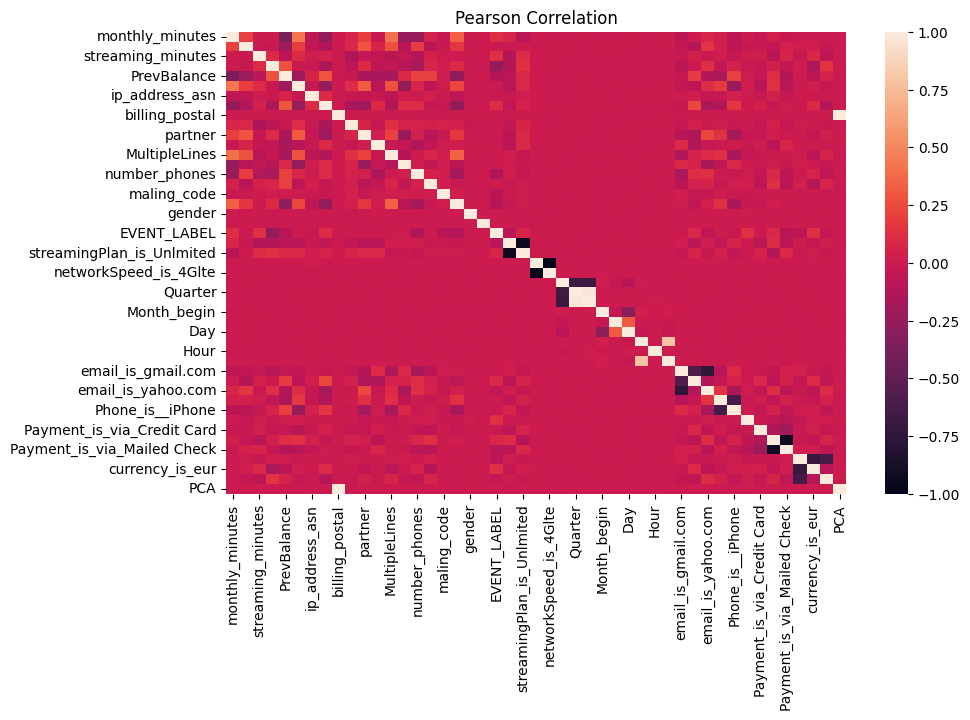

In [58]:
import seaborn as sns
plt.figure(figsize = (10,6))
sns.heatmap(df_num.corr())
plt.title("Pearson Correlation")
plt.show()

In [59]:
from sklearn.preprocessing import StandardScaler
columns_to_scale=['monthly_minutes', 'streaming_minutes', 'TotalBilled', 'PrevBalance', 'ip_address_asn', 'phone_area_code','billing_postal' ]
for col in columns_to_scale:
    scaler = StandardScaler()
    scaled_column=df_num[col].values.reshape(-1, 1)
    df_num[col]=scaler.fit_transform(scaled_column)

In [60]:
df_num

,monthly_minutes,customerServiceCalls,streaming_minutes,TotalBilled,PrevBalance,latePayments,ip_address_asn,phone_area_code,billing_postal,billing_state,partner,PhoneService,MultipleLines,device_protection,number_phones,contract_code,maling_code,paperlessBilling,gender,senior_citizen,EVENT_LABEL,streamingPlan_is_3GB,streamingPlan_is_Unlmited,networkSpeed_is_5G,networkSpeed_is_4Glte,Year,Quarter,Month,Month_begin,Month_end,Day,Day_Week,Hour,is_weekend,email_is_gmail.com,email_is_hotmail.com,email_is_yahoo.com,Phone_is__Samsung,Phone_is__iPhone,Payment_is_via_Bank Transfer,Payment_is_via_Credit Card,Payment_is_via_Electronic Check,Payment_is_via_Mailed Check,currency_is_cad,currency_is_eur,currency_is_usd,PCA
0,0.538502,2.0,1.168552,0.979565,-0.370789,5.0,-1.071521,0.509751,-0.385465,0.004680,1,1,0,0.018352,6.0,0.129073,0.009221,0,1,1.0,0,1,0,1,0,2019,4,11,0,1,30,5,23,1,0,0,1,1,0,0,0,0,1,0,0,1,-10938.919087
1,-0.545549,2.0,-0.763352,-1.382801,-0.538487,5.0,1.135365,-0.615054,-0.897949,0.063406,1,1,1,0.091669,5.0,0.091669,0.036934,1,0,0.0,0,0,1,1,0,2020,3,9,0,0,27,6,3,1,1,0,0,1,0,0,0,0,1,0,1,0,-25754.525926
2,1.172706,2.0,1.220267,0.388973,-0.622336,6.0,-0.922552,-1.458659,0.652621,0.024422,1,1,1,0.036934,5.0,0.140504,0.060506,1,0,1.0,0,0,1,1,0,2020,1,1,0,0,12,6,15,1,1,0,0,0,0,0,1,0,0,1,0,0,18727.717008
3,0.436060,3.0,0.592068,0.670207,-0.203090,6.0,-1.076682,-1.083723,-1.076939,0.031873,0,1,0,0.018352,6.0,0.140504,0.098000,0,1,0.0,0,1,0,1,0,2020,4,10,0,0,9,4,18,0,0,0,1,0,1,0,0,0,1,1,0,0,-30708.249124
4,0.786201,3.0,-2.603853,-0.398482,0.803099,5.0,0.977676,-0.427587,-0.109862,0.055606,1,1,1,0.119842,7.0,0.140504,0.036934,1,0,1.0,0,1,0,0,1,2020,4,10,0,0,17,5,22,1,1,0,0,1,0,0,0,1,0,1,0,0,-3218.384864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100995,-0.900382,2.0,-0.316156,0.557714,-0.119241,6.0,1.269384,1.072154,-1.527824,0.042904,0,0,0,0.140504,6.0,0.004320,0.009221,0,1,1.0,0,0,1,0,1,2019,4,11,0,0,16,5,12,1,1,0,0,1,0,0,0,1,0,1,0,0,-43769.772966
100996,-0.669105,1.0,0.330685,0.726454,0.551552,4.0,1.191726,0.228550,-0.129310,0.054395,0,0,1,0.098000,4.0,0.091669,0.068007,0,1,0.0,0,1,0,1,0,2019,4,11,0,0,29,4,7,0,1,0,0,0,1,0,0,1,0,1,0,0,-3781.396741
100997,0.832144,1.0,1.347751,0.501467,0.216155,4.0,1.231652,1.353355,0.102114,0.042904,0,0,1,0.140504,3.0,0.068007,0.068007,1,1,1.0,0,0,1,0,1,2020,1,1,0,0,3,4,6,0,0,1,0,1,0,0,0,0,1,1,0,0,2835.856714
100998,-0.975063,2.0,1.536171,1.232675,0.383854,4.0,-1.213192,0.978420,1.054115,0.060846,1,0,1,0.140504,5.0,0.036934,0.004160,1,0,1.0,0,0,1,0,1,2020,3,8,0,0,27,3,0,0,1,0,0,1,0,0,0,0,1,1,0,0,30226.022673


In [61]:
df_num=df_num.sample(frac=1.0)

In [62]:
x=df_num.drop(columns=['EVENT_LABEL'])
y=df_num['EVENT_LABEL']

In [63]:
from sklearn.model_selection import train_test_split
train_x, test_x,train_y, test_y=train_test_split(x,y, test_size=0.3, random_state=42)

In [64]:
from sklearn.metrics import accuracy_score, log_loss, f1_score
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.svm import LinearSVC
#from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis#, QuadraticDiscriminantAnalysis
import xgboost
from xgboost import XGBClassifier
import math
from sklearn import metrics

In [65]:
#prepare models
classifiers = [
    #KNeighborsClassifier(n_neighbors = 5),
    #LinearSVC(),
    #DecisionTreeClassifier(criterion = 'gini', max_depth = 3),
    RandomForestClassifier(random_state = 1, max_features = 'sqrt', n_jobs = 1, verbose = 1),
    XGBClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis()#,
    #QuadraticDiscriminantAnalysis()
    ]

In [66]:
for clf in classifiers:
    clf.fit(train_x, train_y)
    name = clf.__class__.__name__
    print("=" * 30)
    print(name)
    print('*Results*')
    
    train_predictions = clf.predict(test_x)
    acc = accuracy_score(test_y, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    f1_scr = f1_score(test_y, train_predictions)
    print("F1: {:.4%}".format(f1_scr))
    
    ll = log_loss(test_y, train_predictions)
    print("Log Loss: {}".format(ll))
    print("\n")
    
    
print("=" * 30)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   18.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


RandomForestClassifier
*Results*


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


Accuracy: 97.1497%
F1: 65.6764%
Log Loss: 1.0273468562754666


XGBClassifier
*Results*
Accuracy: 98.4398%
F1: 84.3058%
Log Loss: 0.5623372265928871


AdaBoostClassifier
*Results*
Accuracy: 96.1696%
F1: 52.5010%
Log Loss: 1.380609985801767


GradientBoostingClassifier
*Results*
Accuracy: 97.1697%
F1: 67.9260%
Log Loss: 1.0201374046524807


GaussianNB
*Results*
Accuracy: 94.5395%
F1: 2.8470%
Log Loss: 1.968180293075104


LinearDiscriminantAnalysis
*Results*
Accuracy: 96.1263%
F1: 58.7651%
Log Loss: 1.3962304643182362


